# now plot some chosen images 

In [31]:
# get packages needs 
import os
import pandas as pd
import glob
import numpy as np
from PIL import Image
import re 
from colordict import ColorDict #add colors for plotting
colors = ColorDict()
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [3]:
# get data from dates 
invert_images_path = './data/munged/W1/WY21/'
raw_images_path = './data/munged/W1/'
#make directories 
save_images_path = './data/derived/W1/WY21/'
save_files_path = './data/derived/W1/'
ext_drive_path = 'F:/CT_temp/'


In [14]:
#create image dictionaries from all imaags 
wy_data = pd.read_csv(save_files_path + 'temporary_wy_data.csv') #uncomment if wy_data is not in your variables environment 
image_dict = {}
def my_func(row):
    if row["filename"] in image_dict:
        return
    path =  invert_images_path + "invert_"+row["filename"]
    img= np.asarray(Image.open(path))
    image_dict[row["filename"]] = img
_ = wy_data.apply(lambda c: my_func(c),axis=1)

In [56]:
#get image info
img_ws = "w1" #pick watershed
img_dt = "20210317" #yyyymmdd
img_path = glob.glob(f"{save_images_path}Hbwtr_{img_ws}_{img_dt}_*.csv") 
img_tm = re.findall(r'\d+', img_path[0])[-1]

#import image df
img_df = pd.read_csv(img_path[0])
img_df.drop("Unnamed: 0", axis =1, inplace=True)
img_df.head() #save df and lose index column

,x,y,R,G,B,temperature,year,week,month,season_autumn,season_spring,season_winter,predict
0,1537,2208,8,7,12,55,2021,11,3,False,False,True,open_water_dark
1,1539,2208,5,4,9,55,2021,11,3,False,False,True,open_water_dark
2,1541,2208,6,5,10,55,2021,11,3,False,False,True,open_water_dark
3,1543,2208,3,3,5,55,2021,11,3,False,False,True,open_water_dark
4,1547,2208,9,9,11,55,2021,11,3,False,False,True,open_water_dark


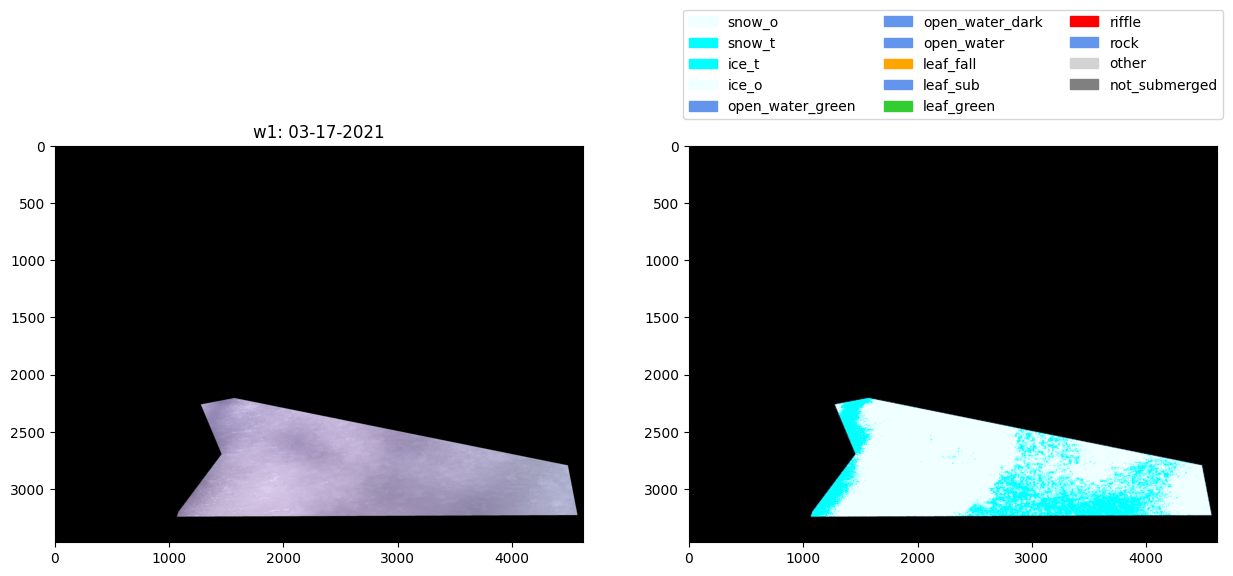

In [57]:
#get original image: 
img = image_dict["Hbwtr_" + img_ws + "_" + img_dt + "_" + img_tm + ".JPG"] #write if statement here

#define classification colors: 
class_rgb = {'snow_o': "azure",
   'snow_t': "cyan",
   'ice_t': "cyan",
   'ice_o': "azure",
   'open_water_green': "cornflowerblue", 
   'open_water_dark': "cornflowerblue",
   'open_water': "cornflowerblue",
   'leaf_fall': "orange",
   'leaf_sub': "cornflowerblue",
   'leaf_green': "limegreen",
   'riffle': "red",
   'rock': "cornflowerblue",
   'other': "lightgray",
   'not_submerged': "gray"}

#get a classifed image: 
img_cp = img.copy()
def apply_change(row):
        pred = row["predict"]
        newR, newG, newB=colors[class_rgb[pred]]
        img_cp[row.y,row.x,:] = [newR, newG,newB]
img_df.apply(lambda x: apply_change(x), axis=1)

#add legend: 
handles = []
for i, label in enumerate(list(class_rgb.keys())):
    handles.append(plt.Rectangle((0, 0), 1, 1, color=list(class_rgb.values())[i]))
#make plot
f, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img_cp)
ax[0].title.set_text(img_ws + ": " + format(dt.strptime(img_dt, '%Y%m%d'), '%m-%d-%Y'))
plt.legend(handles, list(class_rgb.keys()),loc='lower center',bbox_to_anchor=(0.5, 1.05), ncol = 3)
f.set_figheight(7)
f.set_figwidth(15)

plt.savefig(f'chosen_{img_ws}_{img_dt}.png')